In [1]:
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px


spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()


app = dash.Dash()

uniquelaunchsites = spacex_df['Launch Site'].unique().tolist()
lsites = []
lsites.append({'label': 'All Sites', 'value': 'All Sites'})
for site in uniquelaunchsites:
 lsites.append({'label': site, 'value': site})



app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),




                                dcc.Dropdown(id='site_dropdown',options=lsites,placeholder='Select a Launch Site here', searchable = True , value = 'All Sites'),
                                html.Br(),


                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),

                                dcc.RangeSlider(
                                    id='payload_slider',
                                    min=0,
                                    max=10000,
                                    step=1000,
                                    marks = {
                                            0: '0 kg',
                                            1000: '1000 kg',
                                            2000: '2000 kg',
                                            3000: '3000 kg',
                                            4000: '4000 kg',
                                            5000: '5000 kg',
                                            6000: '6000 kg',
                                            7000: '7000 kg',
                                            8000: '8000 kg',
                                            9000: '9000 kg',
                                            10000: '10000 kg'
                                    },

                                    value=[min_payload,max_payload]
                                ),

                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),

                                ])

@app.callback(
     Output(component_id='success-pie-chart',component_property='figure'),
     [Input(component_id='site_dropdown',component_property='value')]
)
def update_graph(site_dropdown):
    if (site_dropdown == 'All Sites'):
        df  = spacex_df[spacex_df['class'] == 1]
        fig = px.pie(df, names = 'Launch Site',hole=.3,title = 'Total Success Launches By all sites')
    else:
        df  = spacex_df.loc[spacex_df['Launch Site'] == site_dropdown]
        fig = px.pie(df, names = 'class',hole=.3,title = 'Total Success Launches for site '+site_dropdown)
    return fig

@app.callback(
     Output(component_id='success-payload-scatter-chart',component_property='figure'),
     [Input(component_id='site_dropdown',component_property='value'),Input(component_id="payload_slider", component_property="value")]
)
def update_scattergraph(site_dropdown,payload_slider):
    if site_dropdown == 'All Sites':
        low, high = payload_slider
        df  = spacex_df
        mask = (df['Payload Mass (kg)'] > low) & (df['Payload Mass (kg)'] < high)
        fig = px.scatter(
            df[mask], x="Payload Mass (kg)", y="class",
            color="Booster Version",
            size='Payload Mass (kg)',
            hover_data=['Payload Mass (kg)'])
    else:
        low, high = payload_slider
        df  = spacex_df.loc[spacex_df['Launch Site'] == site_dropdown]
        mask = (df['Payload Mass (kg)'] > low) & (df['Payload Mass (kg)'] < high)
        fig = px.scatter(
            df[mask], x="Payload Mass (kg)", y="class",
            color="Booster Version",
            size='Payload Mass (kg)',
            hover_data=['Payload Mass (kg)'])
    return fig

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [02/Oct/2021 12:02:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2021 12:02:26] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_0_0m1632070212.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2021 12:02:26] "GET /_dash-component-suites/dash/deps/react@16.v2_0_0m1632070212.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2021 12:02:26] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_0_0m1632070212.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2021 12:02:26] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_0_0m1632070211.min.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2021 12:02:26] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_0_0m1632070212.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2021 12:02:26] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_0_0m1632070212.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2021 12:02:26] "GET /_dash-component-suites/d

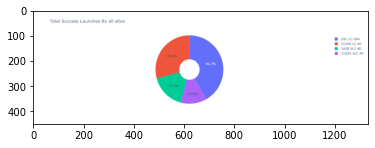

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("newplot.png")
plt.imshow(image)
plt.show()

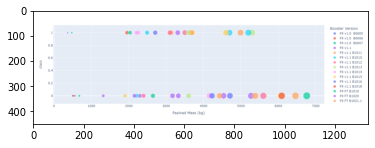

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("newplot1.png")
plt.imshow(image)
plt.show()

<img src="newplot.png" style="height:500px">